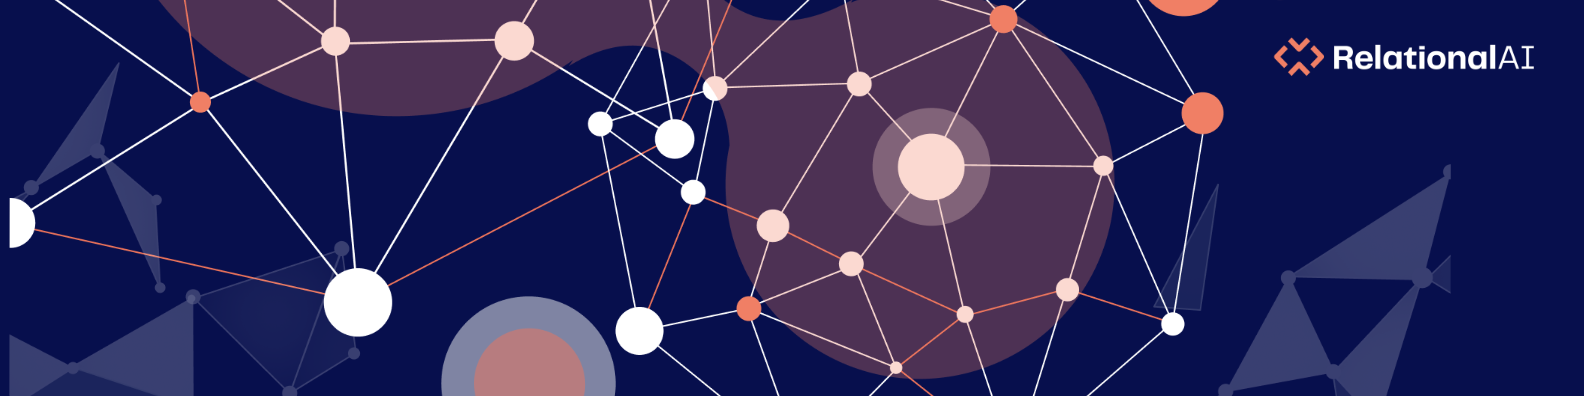

# Triangle community

Triangle community is a community detection algorithm that identifies the triangles in a graph. It is based on the concept that a triangle is a group of three nodes that are connected to each other. The algorithm identifies these connected nodes and assigns a community to them. The algorithm is useful in identifying the communities in a graph and can be used to identify the relationships between different nodes in a graph.

For a meaningful demonstration, let's create a hypothetical scenario where we have a social network representing friendships between individuals. We'll use triangle community to identify key individuals who serve as connectors between different social groups within the network.

First, let us import the `relationalai` library and define our model, which we call `triangle_community`. We also create a type called `Person`.

In [1]:
def install_packages():
    import os
    os.system('pip install relationalai')

install_packages()

In [2]:
import relationalai as rai
from relationalai.std.graphs import Graph

model = rai.Model("triangle_community")
Person = model.Type("Person")

## Let's add some data to our model
We first create a list of people who are friends with each other. Then we iterate over it to create objects of type `Person` with a `name` property. We also set a `friends` property that we use to connect the various nodes in our graph.

In [3]:
friendships = [
  ("Alice", "Bob"), ("Alice", "Charlie"), ("Alice", "David"),
  ("Bob", "Charlie"), ("Bob", "David"), ("Charlie", "David"),
  ("David", "Emily"), ("Emily", "Frank"), ("Emily", "Henry"),
  ("Frank", "Grace"), ("Frank", "Henry"), ("Grace", "Henry"),
  ("Kevin", "Lily"), ("Kevin", "Mark"), ("Lily", "Mark"), 
  ("Mark", "Nancy"), ("Nancy", "Lily"), ("Mark", "Oscar"),
  ("Oscar", "Nancy")
]

with model.rule(dynamic = True):
    for (person_name, friend_name) in friendships:
        person = Person.add(name = person_name)
        person.friends.add(Person.add(name = friend_name))

## Creating the Graph
Let's start by creating a `graph` with nodes and edges. We add all `Person`  instances to `Node` type, and assign the `label` property so that we can see visualize it later in the graph. We then add the `friends` property to `Edge` type. 

In [4]:
# Create graph
graph = Graph(model, undirected = True)
Node, Edge = graph.Node, graph.Edge

# add all Person instances as Nodes, assign `name` property (for displaying)
Node.extend(Person, label = Person.name)

# add all `friends` property as Edges 
Edge.extend(Person.friends)

##  Running the algorithm
To compute the triangle community of each node in the graph, we use the `triangle_community` function. In the following rule, we set the `community` index as a property for the node.

In [5]:
with model.rule():
    node = Node()
    community = graph.compute.triangle_community(node)
    node.set(community = community)

Now, each node will have a `community` property that represents the community it belongs to. The value (community index) is a unique identifier for each community.

## Querying the Graph
Graph Nodes, Edges and their properties are queried using `model.query()` context and `graph.Node()` or `graph.Edge()` types.

Alternatively, the entire graph representation can be fetched using `Graph(model).fetch()`. This returns a dictionary with two keys, `nodes` and `edges`, that represents the entire graph. 

In [6]:
with model.query() as select:
    person = Person()
    node = Node(person) 
    response = select(person.name, node.community)

response

### Let's find out which community does Alice belong to
To filter on a specific person, we can add a condition on the `person.name` property.

In [7]:
with model.query() as select:
    person = Person()
    person.name == "Alice"
    node = Node(person) 
    response = select(person.name, node.community)

response

### Let's find out who belongs to the community with index 1
A filter on the `community` also can be used to see all the nodes in a specific community.

In [8]:
with model.query() as select:
    person = Person()
    node = Node(person) 
    node.community == 1
    response = select(person.name, node.community)

response

## Visualizing the results
The `visualize` function can be used on the graph `compute` object to better understand the results. We assign the `color` properties for nodes based on the community they belong to.

In [9]:
# Get the list of communities ids
with model.query() as select: 
    node = Node()
    response = select(node.community)

communities = response.results["community"].to_list()

graph.visualize(three = False, style = {
    "node": {
        "color": lambda n : ['dark', 'blue', 'pink'][list(communities).index(n.get('community', 0)) % 3 ],
    },
    "edge": {
        "color": "green",
    }
}).display(inline = True)